In [2]:
import pandas as pd 
import nfl_data_py as nfl
import matplotlib.pyplot as plt 
from matplotlib import style 



In [3]:
year = 2020

In [4]:
df = nfl.import_ngs_data(stat_type='rushing')

In [5]:
df

,season,season_type,week,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,...,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2016,REG,0,David Johnson,RB,ARI,3.869201,25.597270,2.689175,293,...,NaN,4.228669,NaN,NaN,16,00-0032187,David,Johnson,31,D.Johnson
1,2016,REG,0,Latavius Murray,RB,LV,3.913071,45.641026,2.600605,195,...,-0.997213,4.041026,-0.997213,0.000000,12,00-0030513,Latavius,Murray,28,L.Murray
2,2016,REG,0,Paul Perkins,RB,NYG,3.682566,5.357143,2.584839,112,...,NaN,4.071429,NaN,NaN,0,00-0032417,Paul,Perkins,28,P.Perkins
3,2016,REG,0,Jonathan Stewart,RB,CAR,4.379927,38.073394,2.877697,218,...,NaN,3.779817,NaN,NaN,9,00-0026153,Jonathan,Stewart,28,J.Stewart
4,2016,REG,0,LeSean McCoy,RB,BUF,3.957640,26.923077,2.991231,234,...,NaN,5.414530,NaN,NaN,13,00-0027029,LeSean,McCoy,25,L.McCoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,2022,POST,21,Christian McCaffrey,RB,SF,3.294048,33.333333,2.595214,15,...,16.087966,5.600000,1.072531,0.466667,1,00-0033280,Christian,McCaffrey,23,C.McCaffrey
4182,2022,POST,21,Miles Sanders,RB,PHI,4.921667,9.090909,2.853100,11,...,-5.642277,3.818182,-0.512934,0.454545,2,00-0035243,Miles,Sanders,26,M.Sanders
4183,2022,POST,21,Isiah Pacheco,RB,KC,5.773846,0.000000,2.999500,10,...,-9.449294,2.600000,-1.049922,0.111111,0,00-0037197,Isiah,Pacheco,10,I.Pacheco
4184,2022,POST,21,Kenneth Gainwell,RB,PHI,4.151042,7.142857,2.410700,14,...,6.312791,3.428571,0.485599,0.384615,0,00-0036919,Kenneth,Gainwell,14,K.Gainwell


In [6]:
df = df[df['week'] == 0]
df = df[df['season'] == year]
df = df.reset_index()

In [7]:
average_ary = df['avg_rush_yards'].mean()
average_ryoe = df['rush_yards_over_expected_per_att'].mean()

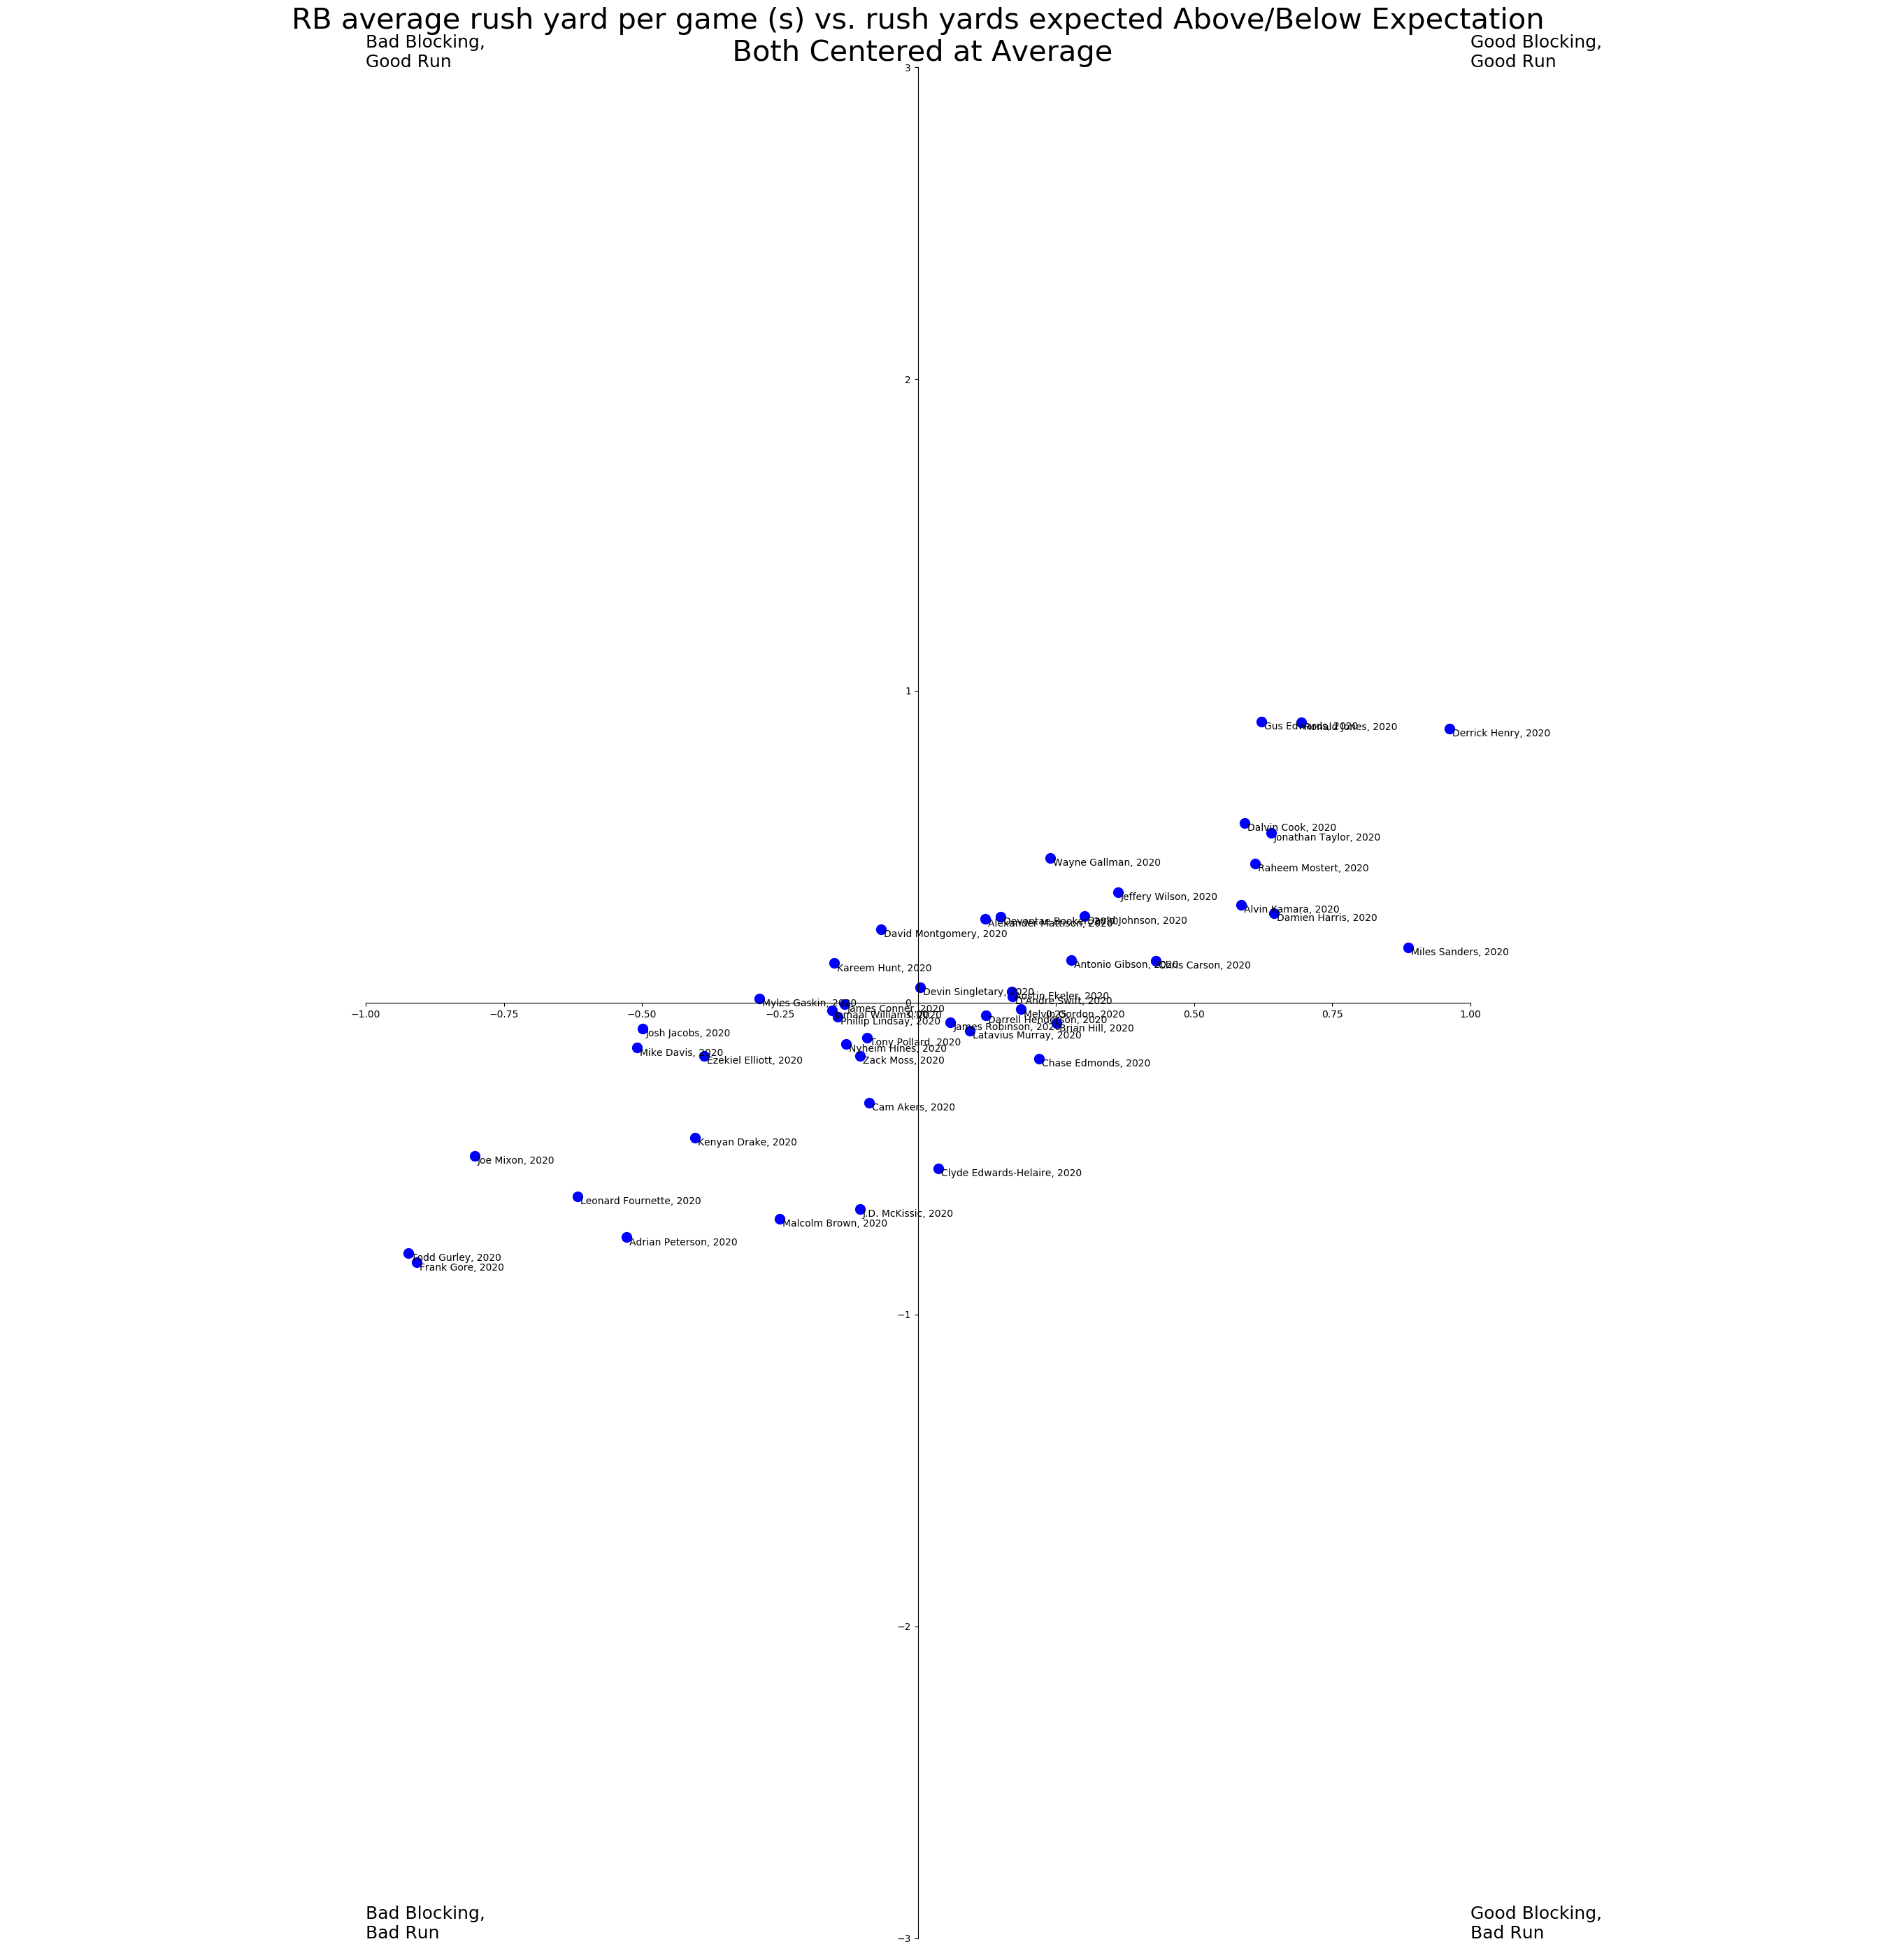

In [10]:
# Visualize the data\

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [34, 28]
plt.rcParams["figure.autolayout"] = True


# Initialize empty lists for x,y 
x = []
y = []

# Define the x and y variables
for rb in df.index:
    x.append(df['avg_rush_yards'][rb] - average_ary)
    y.append(df['rush_yards_over_expected_per_att'][rb] - average_ryoe)
    
# Put x,y into dictionary
xy = pd.DataFrame({'x' : x, 'y' : y})

# Define the plot
fig, ax = plt.subplots()


ax.scatter(xy['x'], xy['y'], s=100, c='blue')

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.autoscale(enable=True) 

# Set x and y axis limits
plt.xlim((-1,1))
plt.ylim((-3,3))



for nameyear in xy.index:
    plt.annotate(f"{df['player_display_name'][nameyear]}, {df['season'][nameyear]}",\
                 (xy['x'][nameyear] + 0.005,
                  xy['y'][nameyear] - 0.025),
                  fontsize=10)

# Annotate Quadrants
plt.annotate('Good Blocking,\nGood Run', (1,3), fontsize=18)
plt.annotate('Bad Blocking,\nGood Run', (-1,3), fontsize=18)
plt.annotate('Bad Blocking,\nBad Run', (-1,-3), fontsize=18)
plt.annotate('Good Blocking,\nBad Run', (1,-3), fontsize=18)
    

# Add a title
plt.title(f'RB average rush yard per game (s) vs. rush yards expected Above/Below Expectation\n Both Centered at Average',
         fontdict={'fontsize': 30})



# Style the chart
plt.show()